In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing Dataset
dataset = pd.read_csv(r'C:\Users\Aman\Desktop\ML_assignment_1\diabetes2.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
def feature_normalize(X):
    #calculating the mean
    mu = np.mean(X, axis = 0)  
    
    #calculating the standard deviation
    sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
    
    #Normalising the dataset
    X_norm = (X - mu)/sigma
    
    #Un-normalising the output column, because we should not normalize output in regression
    X_norm = X_norm.drop('Outcome',axis='columns')
    X_norm.insert(len(X_norm.loc[0]),"Outcome",X.loc[:,"Outcome"])
    return X_norm

#normalising the features
dataset=feature_normalize(dataset)

#adding a constant feature for intercept
dataset.insert(len(dataset.loc[0]),"constant",np.ones(len(dataset)))
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,constant
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1,1.0
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0,1.0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1,1.0
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0,1.0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1,1.0
...,...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487,0,1.0
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677,0,1.0
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580,0,1.0
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1,1.0


In [18]:
# Splitting data into test, validate and train
X_train=dataset.sample(frac = 0.7).reset_index(drop=True)
X_test = dataset.drop(X_train.index).reset_index(drop=True)
X_val = X_test.sample(frac=2/3).reset_index(drop=True)
X_test = X_test.drop(X_val.index).reset_index(drop=True)
Y_train=X_train['Outcome']
Y_test=X_test['Outcome']
Y_val=X_val['Outcome']
X_train=X_train.drop('Outcome',axis='columns')
X_test=X_test.drop('Outcome',axis='columns')
X_val=X_val.drop('Outcome',axis='columns')
print(dataset.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)
X_train

(768, 10)
(538, 9)
(153, 9)
(77, 9)
(538,)
(153,)
(77,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,constant
0,0.045984,-0.747344,-0.470426,0.154433,-0.692439,-0.481038,-0.087153,-0.955839,1.0
1,-1.141108,-0.246915,0.562856,-0.284378,-0.692439,-0.125895,1.213670,-1.040871,1.0
2,-0.547562,-0.653513,-0.160441,-0.033629,0.088512,0.115094,1.192543,-0.445645,1.0
3,-0.547562,-0.872451,-0.263769,0.718617,0.695919,0.761961,0.610040,-0.870806,1.0
4,0.342757,-0.747344,0.356200,0.405181,-0.692439,0.457553,-0.283333,1.595131,1.0
...,...,...,...,...,...,...,...,...,...
533,0.342757,-0.278192,-0.160441,-1.287373,-0.692439,0.736594,-0.636457,0.659776,1.0
534,-0.844335,-0.622237,-0.987066,-0.347065,-0.380059,-0.988384,0.163354,-0.615709,1.0
535,-0.844335,0.722664,0.666184,1.596238,0.869464,1.789337,-0.413113,1.084937,1.0
536,0.639530,-0.528406,0.252871,-0.159003,0.661210,-0.265415,0.754911,0.659776,1.0


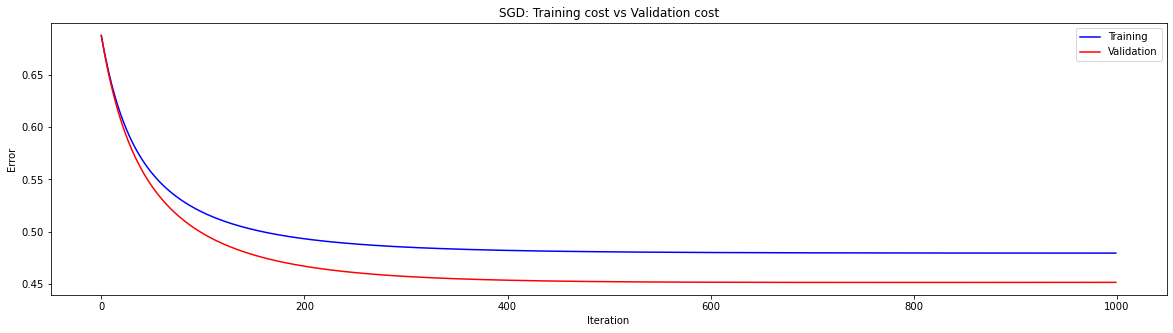

Final weights =
Pregnancies                 0.534986
Glucose                     0.981847
BloodPressure              -0.342682
SkinThickness               0.018554
Insulin                    -0.089610
BMI                         0.857052
DiabetesPedigreeFunction    0.293856
Age                         0.093104
constant                   -0.881559
dtype: float64
Final training error =  0.47951116642609654
Final validation error =  0.45158473041471575


In [19]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-1*z))
    return g
def cost_function(X, y, theta):
    m, n = X.shape
    epsilon=1e-5
    x_dot_theta = X.dot(theta)
    
    J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta)+epsilon)) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta)+epsilon)))
    return J
def gradient(X, Y, theta):
    m, n = X.shape
    x_dot_theta = X.dot(theta)

    grad = 1.0 / m * (sigmoid(x_dot_theta) - Y).T.dot(X)

    return grad
def predict(X, theta):
    # Result is 1 or 0 depending on signmoid function value
    p = sigmoid(X.dot(theta)) >= 0.5
    
    # Since p is boolean, it can be converted 0&1 for false&true respectively
    return p.astype(int)
def sgd_logistic_regression(x_train, y_train, x_val, y_val, weights, alpha, epochs):
    #keeping track of training error
    train_cost_history = np.zeros(epochs)
    
    #keeping track of validation error
    val_cost_history = np.zeros(epochs)
    
    m=len(x_train)
    for i in range(epochs):
        #finding gradient
        grad=gradient(x_train, y_train,weights)
        
        #updating the weights
        weights=weights - (alpha * grad)
        
        #storing error history
        train_cost_history[i]=cost_function(x_train, y_train, weights)
        val_cost_history[i]=cost_function(x_val, y_val, weights)
    return weights, train_cost_history, val_cost_history

weights=np.zeros(len(X_train.iloc[0]))

weights,training_error_history,val_error_history=sgd_logistic_regression(X_train,Y_train,X_val,Y_val,weights,0.05,1000)

plt.figure(figsize=(20, 5))
plt.plot(np.arange(len(training_error_history)), training_error_history,color='blue', label="Training")
plt.plot(np.arange(len(val_error_history)), val_error_history,color='red', label="Validation")
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('SGD: Training cost vs Validation cost')
plt.legend(loc='best')
plt.show()
print('Final weights =')
print(weights)
print('Final training error = ', training_error_history[-1])
print('Final validation error = ',val_error_history[-1])
# np.savetxt('weightsQ2_1.csv' , weights , fmt='%s', delimiter=',')


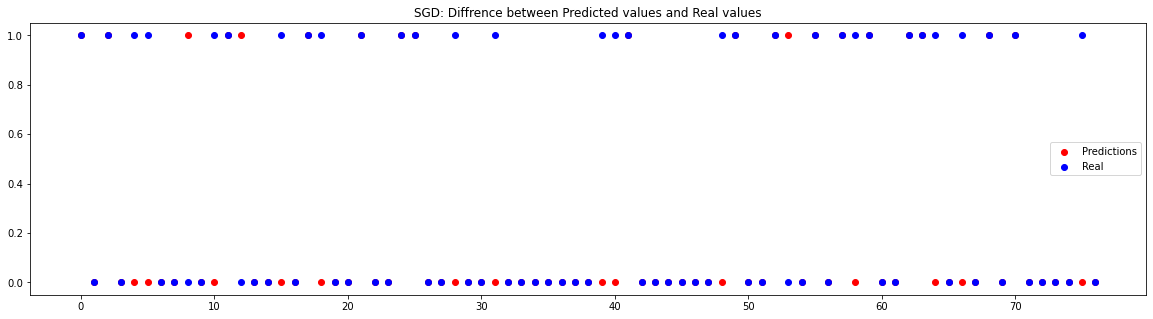

In [20]:
plt.figure(figsize=(20, 5))
test_predictions=predict(X_test,weights)
plt.scatter(np.arange(len(test_predictions)), test_predictions, color='red', label='Predictions')
plt.scatter(np.arange(len(test_predictions)), Y_test, color='blue', label= 'Real')
plt.legend(loc='best')
plt.title('SGD: Diffrence between Predicted values and Real values')
 
# function to show the plot
plt.show()

In [21]:
def conf_matrix(X_test,Y_test,weights):
    #Function to create and print confusion matrix, accuracy, recall, etc
    y_actu = pd.Series(Y_test, name='Actual')
    y_pred = pd.Series(predict(X_test,weights), name='Predicted')
    confusion_matrix = pd.crosstab(y_actu, y_pred)
    tp=confusion_matrix.loc[1].at[1]
    tn=confusion_matrix.loc[0].at[0]
    fn=confusion_matrix.loc[1].at[0]
    fp=confusion_matrix.loc[0].at[1]
    accuracy=(tp+tn)/(len(Y_test))
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*precision*recall/(precision+recall)
    print('Accuracy =',accuracy*100,'%')
    print('Precision =',precision*100,'%')
    print('Recall =',recall*100,'%')
    print('F1 score =',f1_score*100,'%')
    print('\nConfusion matrix is - ')
    print(confusion_matrix)
print('For SGD: ')
conf_matrix(X_test,Y_test,weights)

For SGD: 
Accuracy = 77.92207792207793 %
Precision = 85.0 %
Recall = 54.83870967741935 %
F1 score = 66.66666666666666 %

Confusion matrix is - 
Predicted   0   1
Actual           
0          43   3
1          14  17


alpha = 0.0001
Accuracy = 77.92207792207793 %
Precision = 76.92307692307693 %
Recall = 64.51612903225806 %
F1 score = 70.17543859649122 %

Confusion matrix is - 
Predicted   0   1
Actual           
0          40   6
1          11  20


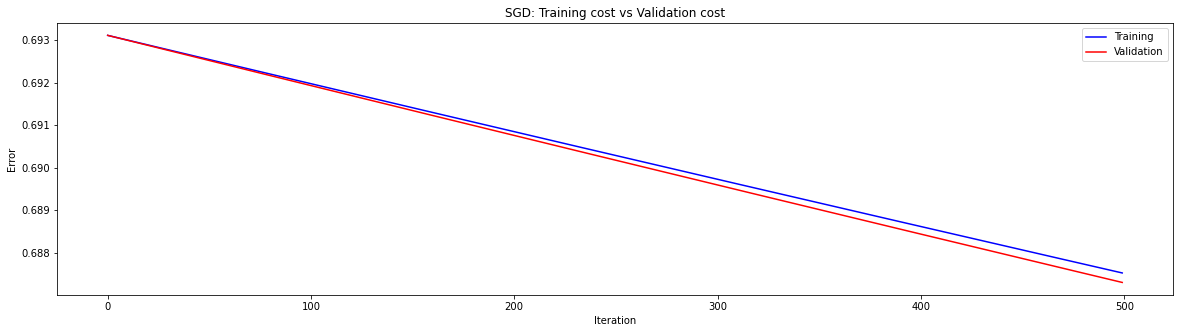



alpha = 0.01
Accuracy = 76.62337662337663 %
Precision = 80.95238095238095 %
Recall = 54.83870967741935 %
F1 score = 65.38461538461537 %

Confusion matrix is - 
Predicted   0   1
Actual           
0          42   4
1          14  17


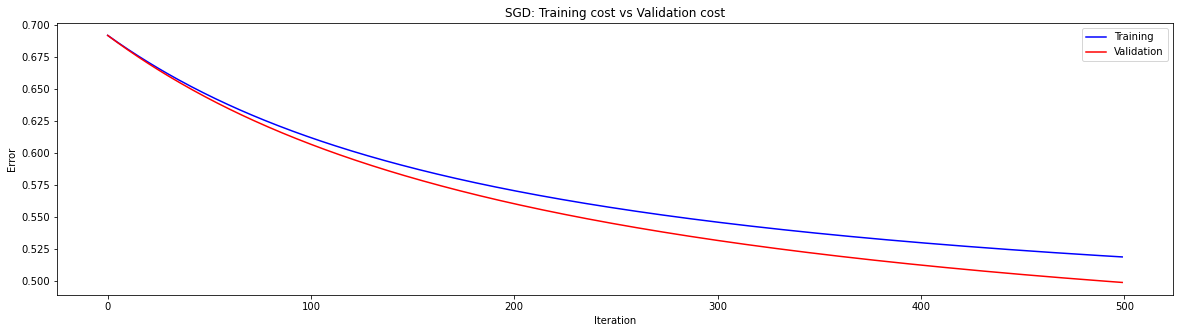



alpha = 10
Accuracy = 74.02597402597402 %
Precision = 73.91304347826086 %
Recall = 54.83870967741935 %
F1 score = 62.96296296296296 %

Confusion matrix is - 
Predicted   0   1
Actual           
0          40   6
1          14  17


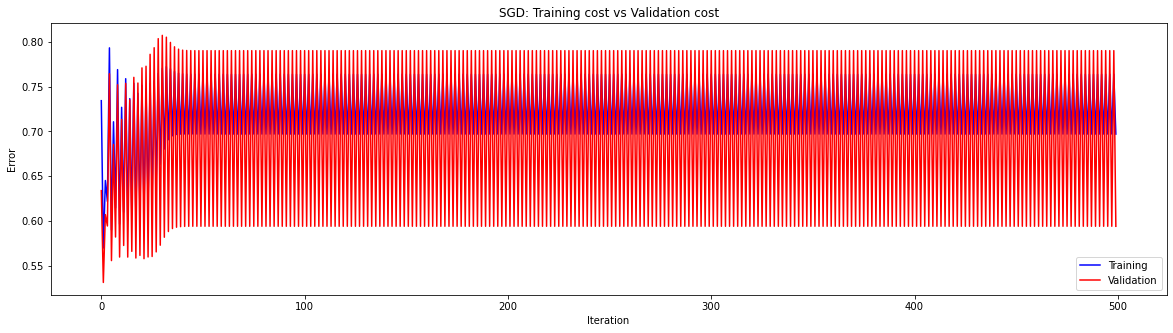

In [22]:
for alpha in [0.0001, 0.01, 10]:
    print('alpha =',alpha)
    weights=np.zeros(len(X_train.iloc[0]))
    weights,training_error_history,val_error_history=sgd_logistic_regression(X_train,Y_train,X_val,Y_val,weights,alpha,500)
    conf_matrix(X_test,Y_test,weights)
    plt.figure(figsize=(20, 5))
    plt.plot(np.arange(len(training_error_history)), training_error_history,color='blue', label="Training")
    plt.plot(np.arange(len(val_error_history)), val_error_history,color='red', label="Validation")
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('SGD: Training cost vs Validation cost')
    plt.legend(loc='best')
    plt.show()
    print()
    print()

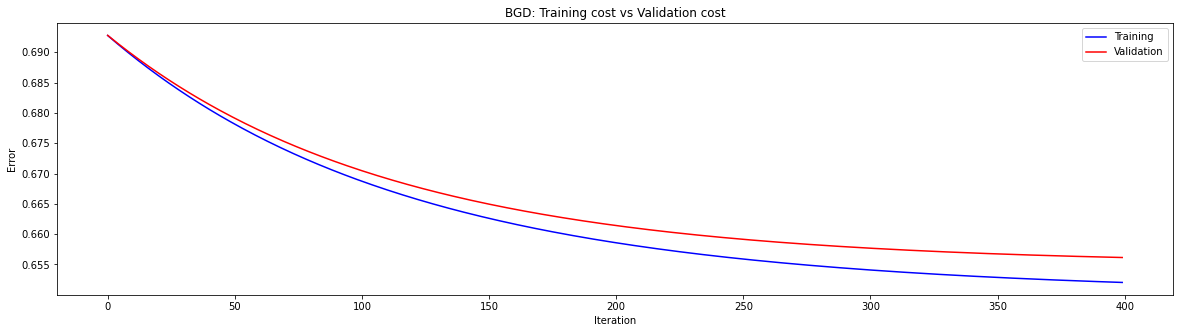

Final weights =
[0.1162015 0.1162015 0.1162015 0.1162015 0.1162015 0.1162015 0.1162015
 0.1162015 0.1162015]
Final validation error =  0.6561525664242109


In [23]:
def bgd_logistic_regression(x_train, y_train, x_val, y_val, weights, alpha, epochs):
    train_cost_history = np.zeros(epochs)
    val_cost_history = np.zeros(epochs)
    m=len(x_train)
    for i in range(epochs):
        grad=gradient(x_train, y_train,weights)
        weights=weights - (alpha * sum(grad))
        train_cost_history[i]=cost_function(x_train, y_train, weights)
        val_cost_history[i]=cost_function(x_val, y_val, weights)
    return weights, train_cost_history, val_cost_history

weights=np.zeros(len(X_train.iloc[0]))

weights,training_error_history,val_error_history=bgd_logistic_regression(X_train,Y_train,X_val,Y_val,weights,0.001,400)

plt.figure(figsize=(20, 5))
plt.plot(np.arange(len(training_error_history)), training_error_history,color='blue', label="Training")
plt.plot(np.arange(len(val_error_history)), val_error_history,color='red', label="Validation")
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('BGD: Training cost vs Validation cost')
plt.legend(loc='best')
plt.show()
print('Final weights =')
print(weights)
print('Final validation error = ',val_error_history[-1])
# np.savetxt('weightsQ2_1.csv' , weights , fmt='%s', delimiter=',')

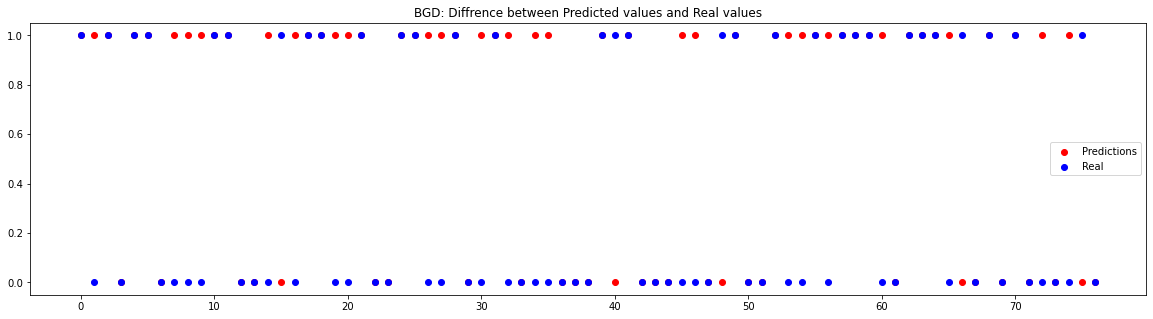

In [24]:
plt.figure(figsize=(20, 5))
test_predictions=predict(X_test,weights)
plt.scatter(np.arange(len(test_predictions)), test_predictions, color='red', label='Predictions')
plt.scatter(np.arange(len(test_predictions)), Y_test, color='blue', label= 'Real')
plt.legend(loc='best')
plt.title('BGD: Diffrence between Predicted values and Real values')
 
# function to show the plot
plt.show()

In [25]:
print('For BGD:')
conf_matrix(X_test,Y_test,weights)

For BGD:
Accuracy = 63.63636363636363 %
Precision = 53.06122448979592 %
Recall = 83.87096774193549 %
F1 score = 65.0 %

Confusion matrix is - 
Predicted   0   1
Actual           
0          23  23
1           5  26


alpha = 0.0001
Accuracy = 63.63636363636363 %
Precision = 53.06122448979592 %
Recall = 83.87096774193549 %
F1 score = 65.0 %

Confusion matrix is - 
Predicted   0   1
Actual           
0          23  23
1           5  26


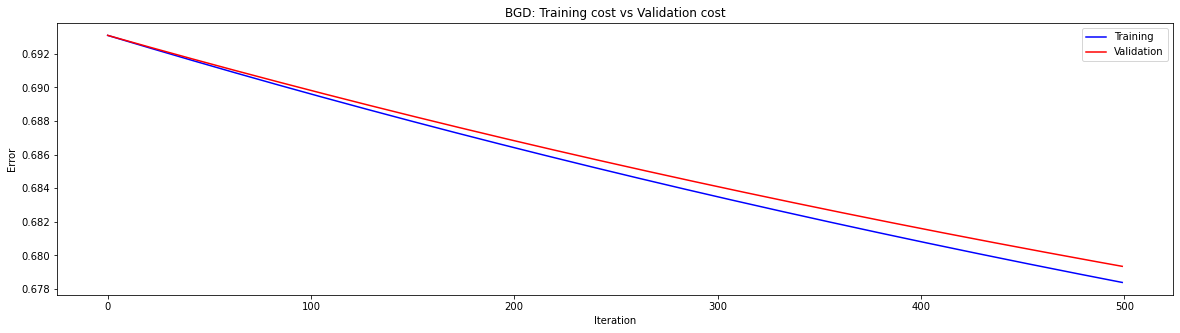



alpha = 0.01
Accuracy = 63.63636363636363 %
Precision = 53.06122448979592 %
Recall = 83.87096774193549 %
F1 score = 65.0 %

Confusion matrix is - 
Predicted   0   1
Actual           
0          23  23
1           5  26


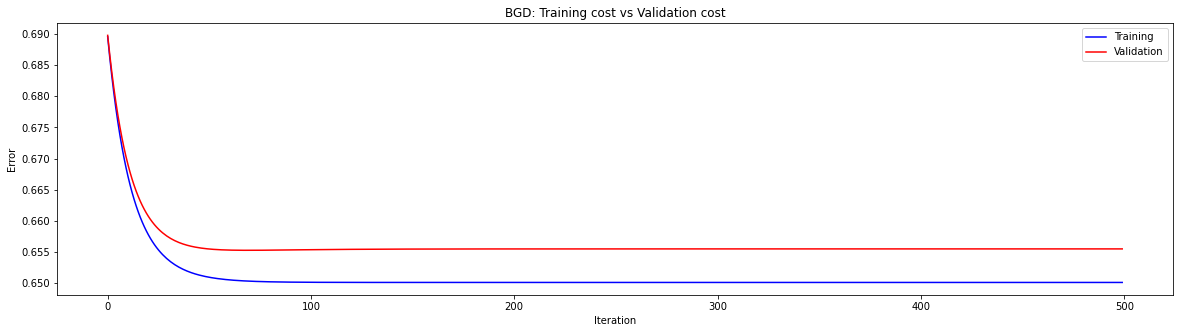



alpha = 10
Accuracy = 36.36363636363637 %
Precision = 17.857142857142858 %
Recall = 16.129032258064516 %
F1 score = 16.94915254237288 %

Confusion matrix is - 
Predicted   0   1
Actual           
0          23  23
1          26   5


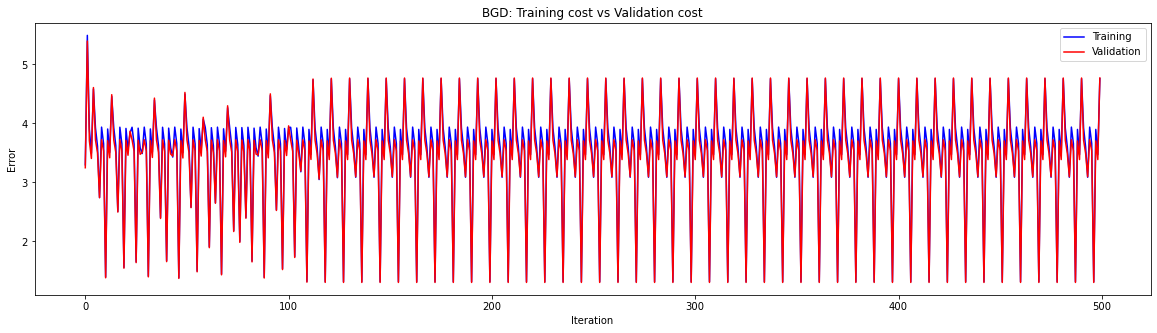

In [27]:
def conf_matrix(X_test,Y_test,weights):
    y_actu = pd.Series(Y_test, name='Actual')
    y_pred = pd.Series(predict(X_test,weights), name='Predicted')
    confusion_matrix = pd.crosstab(y_actu, y_pred)
    tp=confusion_matrix.loc[1].at[1]
    tn=confusion_matrix.loc[0].at[0]
    fn=confusion_matrix.loc[1].at[0]
    fp=confusion_matrix.loc[0].at[1]
    accuracy=(tp+tn)/(len(Y_test))
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1_score=2*precision*recall/(precision+recall)
    print('Accuracy =',accuracy*100,'%')
    print('Precision =',precision*100,'%')
    print('Recall =',recall*100,'%')
    print('F1 score =',f1_score*100,'%')
    print('\nConfusion matrix is - ')
    print(confusion_matrix)
for alpha in [0.0001, 0.01, 10]:
    print('alpha =',alpha)
    new_weights=np.zeros(len(X_train.iloc[0]))
    new_weights,training_error_history,val_error_history=bgd_logistic_regression(X_train,Y_train,X_val,Y_val,new_weights,alpha,500)
    conf_matrix(X_test,Y_test,new_weights)
    plt.figure(figsize=(20, 5))
    plt.plot(np.arange(len(training_error_history)), training_error_history,color='blue', label="Training")
    plt.plot(np.arange(len(val_error_history)), val_error_history,color='red', label="Validation")
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('BGD: Training cost vs Validation cost')
    plt.legend(loc='best')
    plt.show()
    print()
    print()

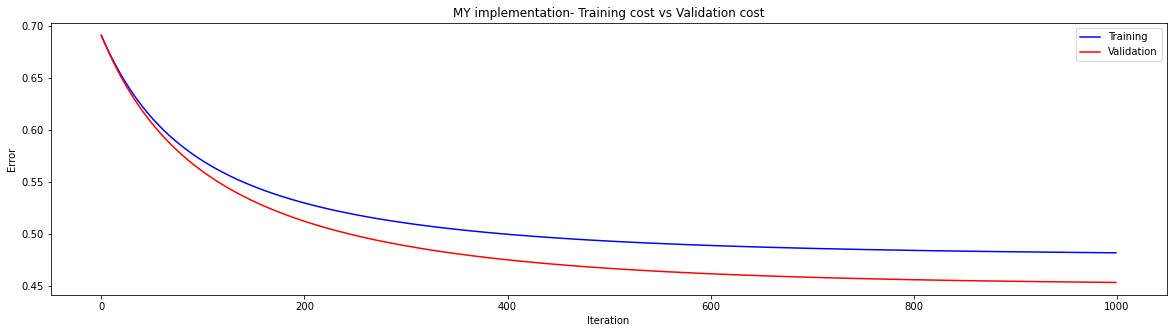

In [28]:
weights=np.zeros(len(X_train.iloc[0]))

my_weights,training_error_history,val_error_history=sgd_logistic_regression(X_train,Y_train,X_val,Y_val,weights,0.02,1000)

plt.figure(figsize=(20, 5))
plt.plot(np.arange(len(training_error_history)), training_error_history,color='blue', label="Training")
plt.plot(np.arange(len(val_error_history)), val_error_history,color='red', label="Validation")
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('MY implementation- Training cost vs Validation cost')
plt.legend(loc='best')
plt.show()


from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred = log_reg.predict(X_test)
# accuracy = metrics.accuracy_score(Y_test, y_pred)
# accuracy_percentage = 100 * accuracy
# print(log_reg.n_iter_)
# print(log_reg.intercept_)
# print(log_reg.coef_)

# accuracy_percentage


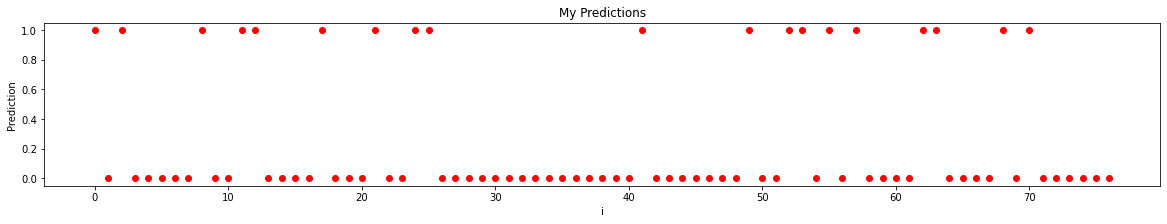

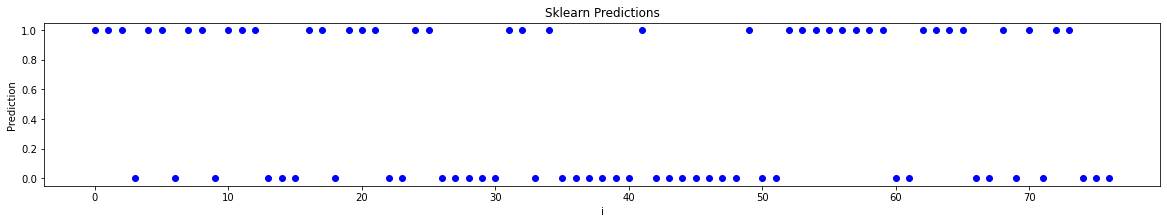

In [29]:
plt.figure(figsize=(20, 3))
plt.scatter(np.arange(len(X_test)), predict(X_test,my_weights), color='red')
plt.ylabel('Prediction')
plt.xlabel('i')
plt.title('My Predictions')
plt.show()

plt.figure(figsize=(20, 3))
plt.scatter(np.arange(len(X_test)), predict(X_test,log_reg.coef_.T), color='blue')
plt.ylabel('Prediction')
plt.xlabel('i')
plt.title('Sklearn Predictions')
plt.show()

In [30]:
print('Number of epochs in sklearn =',log_reg.n_iter_[0])

Number of epochs in sklearn = 18


In [31]:
sk_weights=[]
for i in log_reg.coef_.T:
    for j in i:
        sk_weights.append(j)
print('For SKlearn -\n')
conf_matrix(X_test,Y_test,sk_weights)
print('\n\nFor my implementation -\n')
conf_matrix(X_test,Y_test,my_weights)

For SKlearn -

Accuracy = 70.12987012987013 %
Precision = 60.526315789473685 %
Recall = 74.19354838709677 %
F1 score = 66.66666666666666 %

Confusion matrix is - 
Predicted   0   1
Actual           
0          31  15
1           8  23


For my implementation -

Accuracy = 76.62337662337663 %
Precision = 84.21052631578947 %
Recall = 51.61290322580645 %
F1 score = 63.99999999999999 %

Confusion matrix is - 
Predicted   0   1
Actual           
0          43   3
1          15  16
